# News Classification (HuffPost)

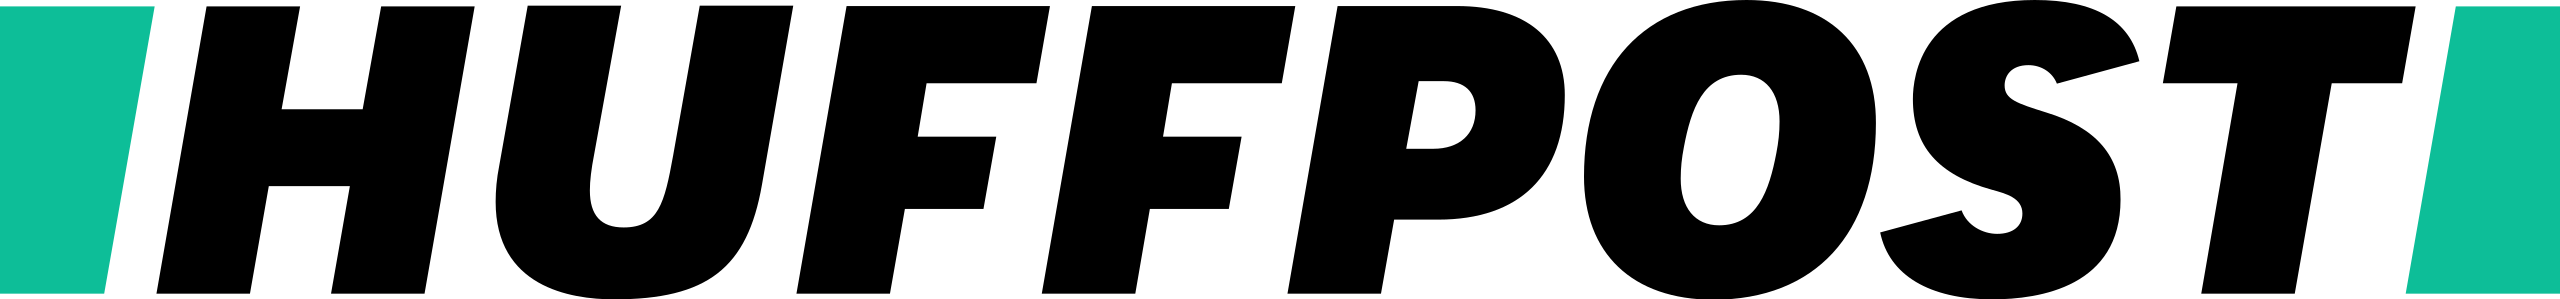

##  Context
This dataset contains around 200,000 news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.
The objective of the exercise is to generate a model using the Naive-Bayes algorithm that can classify articles based on their headlines.

## Variables

This is a **JSON** document with the following keys:

- `Category`: This represents the category of the article and is the variable we want to estimate.
- `Headline`: This is the headline of the HuffPost news.
- `Authors`: This indicates the authors of the articles.
- `Link`: This provides the URL of the news article.
- `Short_description`: This provides a summary of the article.
- `Date`: This represents the date of the article.


## Tasks
- Create a **multiclass classification model** that identifies the following categories: WELLNESS, PARENTING, TRAVEL, BUSINESS, and SPORTS.
- Perform **web scraping** of article headlines from the web in the aforementioned topics. Retrieve more than 20 headlines per category.
- Apply the corresponding **model** to check its performance with current articles.
- Steps for the **model**:
    1. Read the JSON file and convert it to a Pandas DataFrame.
    2. Perform text preprocessing as covered in module 3 of this course.
    3. Apply NaiveBayes by analyzing different values of "Alpha".
    4. Evaluate the model and comment on the results.
- Steps for **web scraping**:
    1. Collect more than 20 article headlines for each category (WELLNESS, PARENTING, TRAVEL, BUSINESS, and SPORTS).
    2. Apply TF-IDF Vectorizer to the headlines.
    3. Make predictions using the created model.
    4. Evaluate and comment on the results.

## Considerations
- The results of the models can vary depending on various factors, and there is no single correct model.
- Regarding the algorithm, it is requested to test **different parameterizations** in search of a model that generalizes correctly (try to avoid overfitting and underfitting).
- Both the **correctness** of the answers and their **presentation** will be valued.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
nltk.download('stopwords')
import requests

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from bs4 import BeautifulSoup
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arnauandrews/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset

In [2]:
# Cargar el documento
url = "/Users/arnauandrews/Desktop/UB-Master/M6-  Técnicas de Maching Learning/Data/act_grupal_News_Category_Dataset_v2.json"

# Crear el DataFrame
df_raw = pd.read_json(url, lines = True)

# Visualizar la información del DataFrame
print(df_raw.info())

# Visualizar la cabecera del DataFrame
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB
None


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


## Preprocessing

In [3]:
# Copiar el DataFrame
df = df_raw.copy()

### NaN and Duplicate Check

In [4]:
print("Porcentaje de valores NaN en las distintas variables:")
print(df.isna().mean()*100)

Porcentaje de valores NaN en las distintas variables:
category             0.0
headline             0.0
authors              0.0
link                 0.0
short_description    0.0
date                 0.0
dtype: float64


In [5]:
duplicados = df.duplicated()
duplicados.value_counts()

False    200840
True         13
dtype: int64

In [6]:
# Eliminating duplicates
df = df.drop_duplicates()

### Category distribution

In [7]:
# Count of each category 
category_counts = df.category.value_counts()

# % of each category 
category_percentages = category_counts / category_counts.sum() * 100

# New Dataframe
category_df = pd.DataFrame({
    'category': category_counts.index,
    'category count': category_counts.values,
    'category count percentage': category_percentages.values
})

category_df

,category,category count,category count percentage
0,POLITICS,32738,16.300538
1,WELLNESS,17824,8.874726
2,ENTERTAINMENT,16058,7.995419
3,TRAVEL,9887,4.922824
4,STYLE & BEAUTY,9646,4.802828
5,PARENTING,8677,4.320355
6,HEALTHY LIVING,6694,3.333001
7,QUEER VOICES,6314,3.143796
8,FOOD & DRINK,6226,3.099980
9,BUSINESS,5937,2.956084


### Feature Selection

## Considerations

- We will remove all unnecessary variables and categories for the study to optimize the computational performance of the model.
- Additionally, we will balance the DataFrame for training and testing. The goal is to ensure that each category has an equal number of records. This is necessary because we will validate the model using a DataFrame with an equal number of records for each category.
- Therefore, when predicting the category of multiple articles using this model, it is important to have a balanced DataFrame in terms of categories.


In [8]:
# Selecting categories to study
categories = ["WELLNESS", "PARENTING", "TRAVEL", "BUSINESS", "SPORTS"]
df = df[df["category"].isin(categories)]

# Balancing number of classes in DataFrame
sample_size = 4884
categories = df['category'].unique()
sample_df = pd.DataFrame()
for category in categories:
    category_sample = df[df['category'] == category]
    if len(category_sample) >= sample_size:
        category_sample = category_sample.sample(n=sample_size, replace=False)
    else:
        category_sample = category_sample.sample(n=len(category_sample), replace=True)
    sample_df = pd.concat([sample_df, category_sample])

sample_df.reset_index(drop=True, inplace=True)
df = sample_df

# Value Counts for each category
counts = df["category"].value_counts()
normalized_counts = df["category"].value_counts(normalize=True)

# Resampled DataFrame
counts_df = pd.DataFrame(counts)
normalized_counts_df = pd.DataFrame(normalized_counts)
counts_df.columns = ["Count"]
normalized_counts_df.columns = ["Normalized Count"]
result = pd.concat([counts_df, normalized_counts_df], axis=1)
print(result)

           Count  Normalized Count
SPORTS      4884               0.2
BUSINESS    4884               0.2
TRAVEL      4884               0.2
WELLNESS    4884               0.2
PARENTING   4884               0.2


In this way, we apply the *under-sampling* technique, which reduces the number of classes with the majority of values to balance the class distribution.

---

Balancing the number of article categories prevents the model from being biased towards favoring Wellness, Travel, Parenting, and Business simply because they are categories with more values.

---

The main drawback of this technique is that by reducing the amount of data, we potentially lose relevant information for training and testing the model.

In [9]:
# Duplicate check
duplicados = df.duplicated()
duplicados.value_counts()

False    24420
dtype: int64

## Modelling

### Vectorizing 'headline' variable

In [10]:
# Converting text to vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
vectorizer.fit(df["headline"].values)
vect = vectorizer.transform(df["headline"].values)
vect.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# Creating dataframe with words from the vocabulary
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
df_tf = pd.DataFrame(vect.todense(), columns = vocab)
print(df_tf.shape)
df_tf.head()

(24420, 20341)


,00,000,000th,007,01,012,083,10,100,1000,...,zubairy,zuckerberg,zuckerman,zumba,zurich,zurlon,zyberk,zynga,zzs,étretat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Train/Test
X = df_tf.values
y = df["category"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(19536, 20341) (19536,)
(4884, 20341) (4884,)


In [13]:
# Training and Fitting the Model
mnb_model = MultinomialNB(alpha=0.5)
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.31
Precisión sobre los datos de test: 80.59


We can see that we have achieved **relatively good results** using the **default hyperparameters**. Additionally, it also appears that the model is not **overfitting** too much to the training data.

### Evaluation: Confusion Matrix & Classification Report

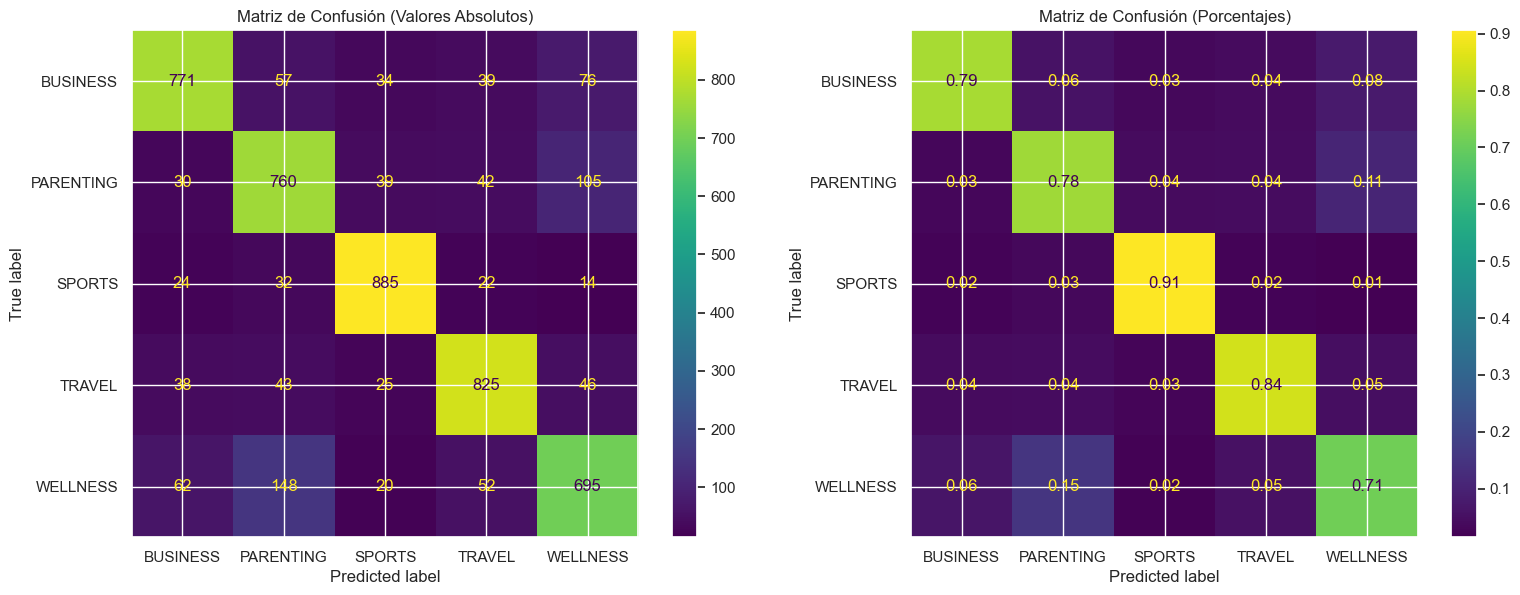

In [14]:

labels = ['BUSINESS', 'PARENTING', 'SPORTS', 'TRAVEL', 'WELLNESS']

# Confusion Matrix
cm = confusion_matrix(y_test, pred_test, labels=labels)
cm_percent = cm / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[0])
ax[0].set_title('Matriz de Confusión (Valores Absolutos)')

disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=labels)
disp_percent.plot(ax=ax[1], values_format='.2f')  # Muestra los porcentajes con 2 decimales
ax[1].set_title('Matriz de Confusión (Porcentajes)')

plt.tight_layout()

In [15]:
cr = classification_report(y_test, pred_test)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.83      0.79      0.81       977
   PARENTING       0.73      0.78      0.75       976
      SPORTS       0.88      0.91      0.89       977
      TRAVEL       0.84      0.84      0.84       977
    WELLNESS       0.74      0.71      0.73       977

    accuracy                           0.81      4884
   macro avg       0.81      0.81      0.81      4884
weighted avg       0.81      0.81      0.81      4884



On one hand, we can see that the **Sports** category has the best performance with a precision, recall, and F1-score of 88% or higher. On the other hand, the **Wellness** category has the lowest performance with a precision, recall, and F1-score of 75% or lower.

Lastly, it is worth mentioning that the **average precision** is 81%, indicating a good **overall balance** in the model's performance across all classes.

## Hyperparamer tuning 

In [16]:
# Defining hyperparameters
param_grid = {
    'alpha': [0.5, 1.0, 1.5],
}

#Grid Search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Selecting best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best score found:", best_score)

Best parameters found: {'alpha': 1.0}
Best score found: 0.7957614328427651


In [17]:
# Training and fitting the improved model
second_mnb_model = MultinomialNB(alpha=1)
second_mnb_model.fit(X_train, y_train)
pred_train = second_mnb_model.predict(X_train)
pred_test = second_mnb_model.predict(X_test)
print("Precision over Training Dataset: {:.2f}".format(100.0*second_mnb_model.score(X_train, y_train)))
print("Precision over Testing Dataset: {:.2f}".format(100.0*second_mnb_model.score(X_test, y_test)))

Precision over Training Dataset: 90.88
Precision over Testing Dataset: 80.94


We can see that we have **increased the precision** on the test data (slightly) while **reducing overfitting** to the training data (slightly).

### Evaluation of improved model: Confusion Matrix & Classification Report

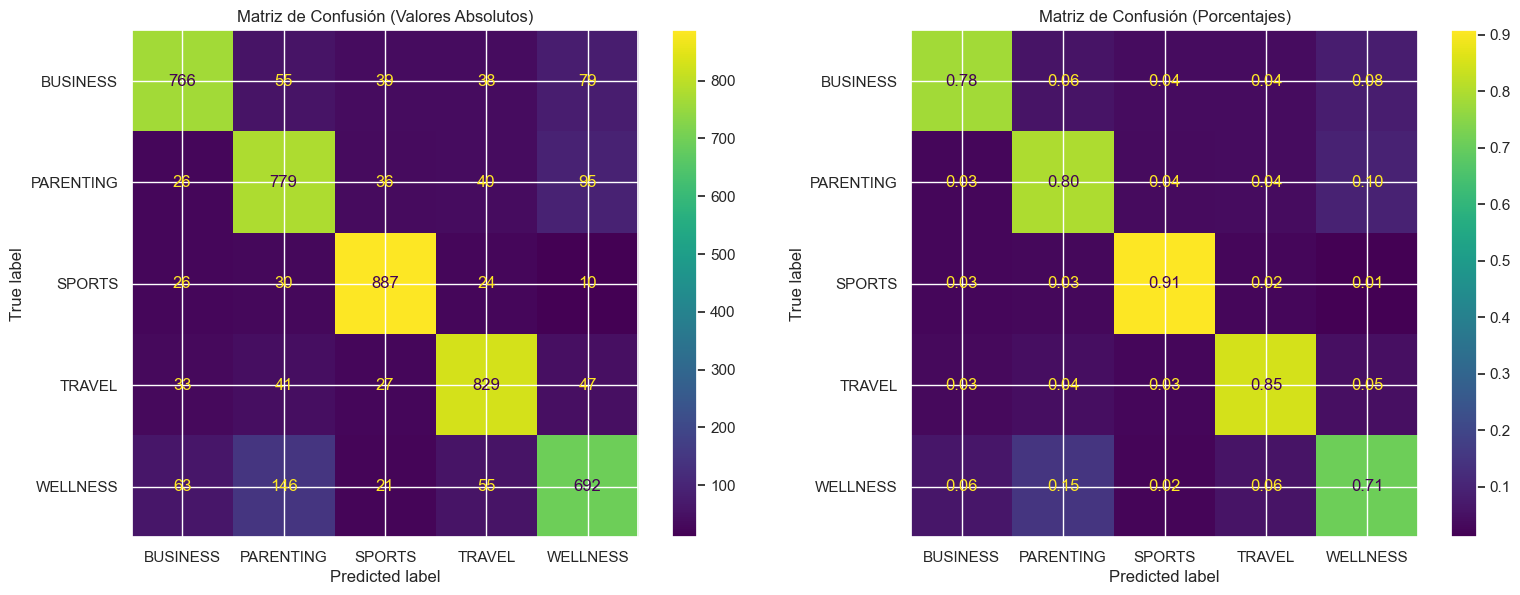

In [18]:
labels = ['BUSINESS', 'PARENTING', 'SPORTS', 'TRAVEL', 'WELLNESS']

# Confusion Matrix
cm = confusion_matrix(y_test, pred_test, labels=labels)
cm_percent = cm / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[0])
ax[0].set_title('Matriz de Confusión (Valores Absolutos)')

disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=labels)
disp_percent.plot(ax=ax[1], values_format='.2f')  # Muestra los porcentajes con 2 decimales
ax[1].set_title('Matriz de Confusión (Porcentajes)')

plt.tight_layout()

In [19]:
cr = classification_report(y_test, pred_test)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.84      0.78      0.81       977
   PARENTING       0.74      0.80      0.77       976
      SPORTS       0.88      0.91      0.89       977
      TRAVEL       0.84      0.85      0.84       977
    WELLNESS       0.75      0.71      0.73       977

    accuracy                           0.81      4884
   macro avg       0.81      0.81      0.81      4884
weighted avg       0.81      0.81      0.81      4884



On one hand, we can see that the **Sports** category continues to have the best performance with a precision, recall, and F1-score of 87% or higher. On the other hand, the **Wellness** category continues to have the lowest performance with a precision, recall, and F1-score of 74% or lower.

Lastly, it is worth mentioning that the **average precision** has remained at 81%, indicating a good **overall balance** in the model's performance across all classes.

## Scrapping new data

In [20]:
# Url by category
pages = [
    {
        "url": "https://www.huffpost.com/life/healthy-living",
        "category": "WELLNESS"
    },
    {
        "url": "https://www.huffpost.com/life/parents",
        "category": "PARENTING"
    },
    {
        "url": "https://www.huffpost.com/life/travel",
        "category": "TRAVEL"
    },
    {
        "url": "https://www.huffpost.com/section/sports",
        "category": "SPORTS"
    },
    {
        "url": "https://www.huffpost.com/impact/business",
        "category": "BUSINESS"
    }
]

# Inicializar las listas para guardar la información
headlines = []
categories = []

for page in pages:
    url = page["url"]
    category = page["category"]

    # Enviar una solicitud GET a cada web
    response = requests.get(url)

    # Crear un objeto BeautifulSoup para analizar el contenido HTML de cada web
    soup = BeautifulSoup(response.content, "html.parser")

    # Buscar todas las noticias de cada web
    articles = soup.find_all("div", class_="card__headlines")

    # Iniciar un contador para tener un seguimiento del número de artículos por categoría
    count = 0

    # Iterar sobre cada noticia y extraer la información
    for article in articles:
        if count >= 100:
            break

        # Extraer el titular de la noticia
        headline_element = article.find("h3")
        headline = headline_element.text.strip() if headline_element else None
        headlines.append(headline)

        # Enviar una solicitud GET a cada noticia
        article_response = requests.get(url)
        article_soup = BeautifulSoup(article_response.content, "html.parser")

        # Agregar la categoría a la lista de categorías
        categories.append(category)

        count += 1

    if count >= 100:
        continue

# Crear el DataFrame
data = pd.DataFrame({
    "headline": headlines,
    "category": categories
})

# Poner las categorías en mayúsculas
data["category"] = data["category"].str.upper()

# Eliminar los registros con valores NaN
data.dropna(inplace=True)

# Visualizar el DataFrame
data.head()

,headline,category
0,TikTokers Are Using This Common Acne Treatment...,WELLNESS
1,This Is The Most Commonly Missed Warning Sign ...,WELLNESS
2,5 Signs You’re In A Constant State Of ‘Fight O...,WELLNESS
3,"The 6 Worst Foods And Drinks For Your Teeth, A...",WELLNESS
4,The 1 Thing Therapists Say Harms Your Happines...,WELLNESS


### NaN Counts

In [21]:
print("Porcentaje de valores NaN en las distintas variables:")
print(data.isna().mean()*100)

Porcentaje de valores NaN en las distintas variables:
headline    0.0
category    0.0
dtype: float64


### Category Distribution

In [22]:
# Calcular el conteo de cada categoría
category_counts_2 = data.category.value_counts()

# Calcular el porcentaje de cada categoría
category_percentages_2 = category_counts_2 / category_counts_2.sum() * 100

# Crear el nuevo DataFrame
category_df_2 = pd.DataFrame({
    'category': category_counts_2.index,
    'category count': category_counts_2.values,
    'category count percentage': category_percentages_2.values
})

category_df_2

,category,category count,category count percentage
0,WELLNESS,30,22.058824
1,TRAVEL,30,22.058824
2,SPORTS,28,20.588235
3,BUSINESS,28,20.588235
4,PARENTING,20,14.705882


### Vectorizing 'headline'

In [23]:
# Dataframe for validation
validation = data[['headline','category']]

# Vectorizing headline 
vect_2 = vectorizer.transform(validation["headline"].values)

In [24]:
# Creating Dataframe with words from the vocabulary 
df_tf2 = pd.DataFrame(vect_2.todense(), columns = vocab)
print(df_tf2.shape)
df_tf2.head()

(136, 20341)


,00,000,000th,007,01,012,083,10,100,1000,...,zubairy,zuckerberg,zuckerman,zumba,zurich,zurlon,zyberk,zynga,zzs,étretat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X = df_tf2.values
y = validation["category"]

y_pred = second_mnb_model.predict(X)
print("Precision over dataset: {:.2f}".format(100.0*second_mnb_model.score(X, y)))

Precision over dataset: 60.29


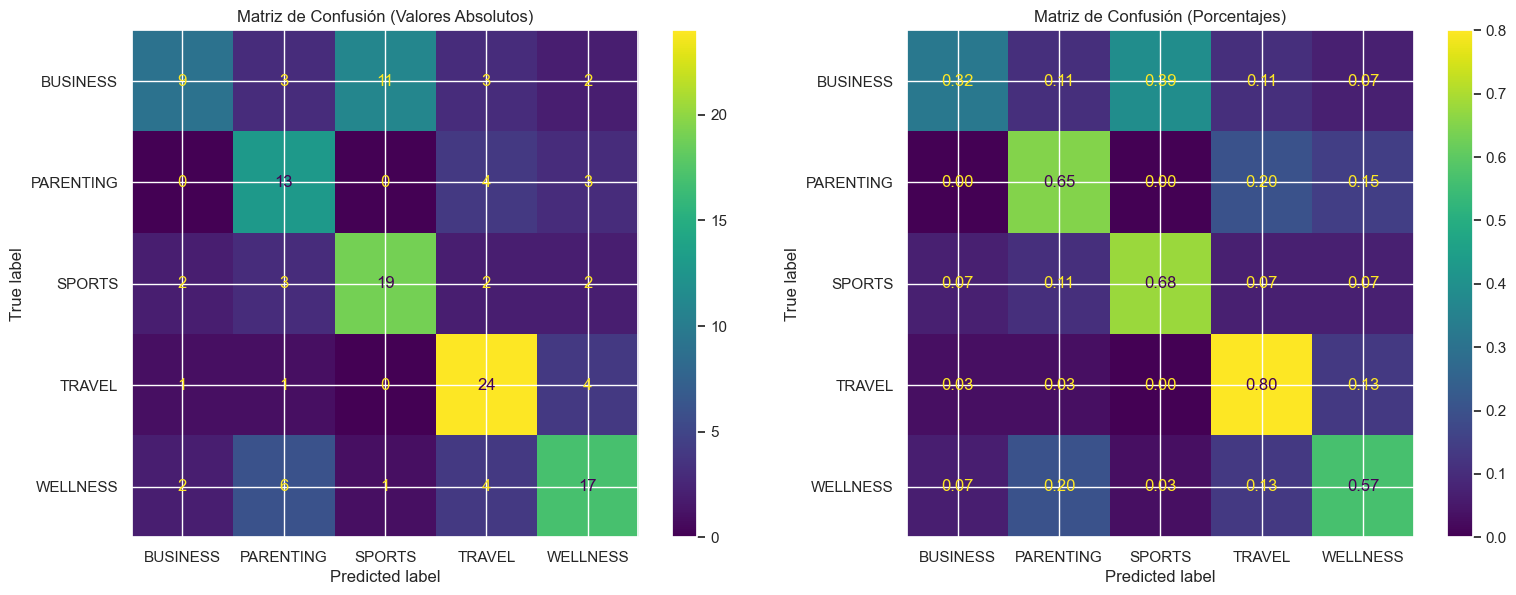

In [26]:
# Labels
labels = ['BUSINESS', 'PARENTING', 'SPORTS', 'TRAVEL', 'WELLNESS']

# Confusion Matrix
cm = confusion_matrix(y, y_pred, labels=labels)
cm_percent = cm / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[0])
ax[0].set_title('Matriz de Confusión (Valores Absolutos)')

disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=labels)
disp_percent.plot(ax=ax[1], values_format='.2f')  # Muestra los porcentajes con 2 decimales
ax[1].set_title('Matriz de Confusión (Porcentajes)')

plt.tight_layout()

In [27]:
cr = classification_report(y, y_pred)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.64      0.32      0.43        28
   PARENTING       0.50      0.65      0.57        20
      SPORTS       0.61      0.68      0.64        28
      TRAVEL       0.65      0.80      0.72        30
    WELLNESS       0.61      0.57      0.59        30

    accuracy                           0.60       136
   macro avg       0.60      0.60      0.59       136
weighted avg       0.61      0.60      0.59       136



The model has an overall **accuracy of 0.60**, which means it correctly classifies 60% of all articles, a value higher than the No Information Rate (NIR), which would give us an average precision of 0.20.

Specifically:

- The category with the highest predictive capacity is *Travel* with a precision of 0.65 and a recall of 0.80.

- The category with the lowest predictive capacity is *Business* with a precision of 0.64 and a recall of 0326.

To improve the model, we recommend:

- **Testing the model with more articles**, as it could be that for categories with lower predictive capacity (Business, Parenting, and Sports), the model has not captured the patterns or keyword trends in the articles due to the small quantity (27), on average.

- **Training the model with more detailed keyword features** that define the articles belonging to categories with lower predictive capacity, in order to optimize the predictive capacity of the model for these categories (Business, Parenting, and Sports).

However, **the model provides significant value with its predictive capacity and can be confidently used to classify Travel and Wellness articles**. When predicting the categories of Business, Parenting, and Sports, the model's classifications should be evaluated with caution, as its accuracy is lower.